In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
Airlines = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
Airlines


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
Airlines.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [4]:
Airlines.tail(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


Drop the 'ID#' as it is not required.

In [5]:
Airlines.drop(['ID#'],inplace=True,axis = 1)
Airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [7]:
Airlines[Airlines.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [8]:
Airlines = Airlines.drop_duplicates()
Airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
Airlines[Airlines.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [10]:
Airlines.shape

(3998, 11)

Normalization Function:-

In [11]:
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

Normalization data from (considering the numerical part of the data)

In [12]:
Airlines=minmax_func(Airlines.iloc[:,1:])
Airlines

# This is a scale value.

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [13]:
ss=StandardScaler()
x=ss.fit_transform(Airlines)
x

array([[-0.18632279, -0.76973166, -0.09825429, ..., -0.3622191 ,
         1.39523468, -0.76707163],
       [-0.18632279, -0.76973166, -0.09825429, ..., -0.3622191 ,
         1.37973643, -0.76707163],
       [-0.18632279, -0.76973166, -0.09825429, ..., -0.3622191 ,
         1.41170157, -0.76707163],
       ...,
       [-0.18632279,  0.68289387, -0.09825429, ..., -0.3622191 ,
        -1.31599028,  1.30365921],
       [-0.18632279, -0.76973166, -0.09825429, ..., -0.09858321,
        -1.3164746 , -0.76707163],
       [-0.18632279, -0.76973166, -0.09825429, ..., -0.3622191 ,
        -1.31792757, -0.76707163]])

Now, Create a DENDROGRAM

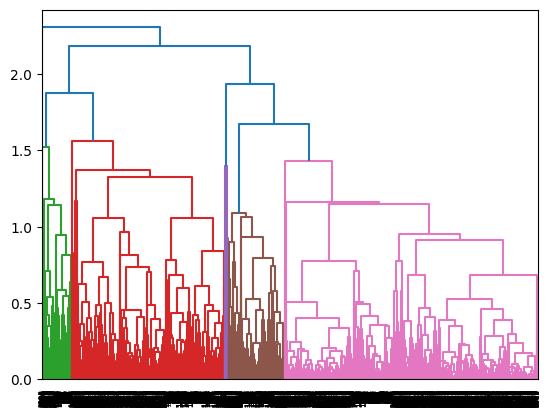

In [15]:
dendrogram = sch.dendrogram(sch.linkage(Airlines, method='complete'))

Create Clustering:-

In [16]:
hc = AgglomerativeClustering(n_clusters=4,affinity = 'euclidean',linkage ='complete')

Create Labels:-

In [17]:
y_hc = hc.fit_predict(Airlines)
y_hc

array([2, 2, 2, ..., 0, 2, 2])

In [18]:
clusters=pd.DataFrame(y_hc,columns=['Clusters'])
clusters

,Clusters
0,2
1,2
2,2
3,2
4,0
...,...
3993,0
3994,0
3995,0
3996,2


In [19]:
Airlines.value_counts()

Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?
0.0         0.0        0.0        0.0        0.000000     0.000000     0.000000           0.000000         1.000000           0.0       5
                                                                                                           0.611285           0.0       2
                                                                                                           0.360622           0.0       2
                                                                                                           0.043164           0.0       2
                                                                                                           0.192308           0.0       2
                                                                                                                                       ..
                                       

In [20]:
Airlines['h_clusterid'] = y_hc
Airlines

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,2
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,2
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,2
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,2
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,2


In [21]:
Airlines.groupby('h_clusterid').mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,
0,0.021547,0.417233,0.003739,0.004589,0.109261,0.181351,0.026033,0.046266,0.558115,1.000000
1,0.002894,0.000000,0.741935,0.000000,0.055441,0.187547,0.014383,0.037127,0.456023,0.193548
2,0.007940,0.178170,0.000201,0.002207,0.038755,0.105813,0.007371,0.012326,0.460853,0.000000
3,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.000000


K-Means

In [22]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(Airlines.iloc[:,1:])
scaled_df

array([[-0.76973166, -0.09825429, -0.06277446, ...,  1.39523468,
        -0.76707163,  0.77047518],
       [-0.76973166, -0.09825429, -0.06277446, ...,  1.37973643,
        -0.76707163,  0.77047518],
       [-0.76973166, -0.09825429, -0.06277446, ...,  1.41170157,
        -0.76707163,  0.77047518],
       ...,
       [ 0.68289387, -0.09825429, -0.06277446, ..., -1.31599028,
         1.30365921, -1.30453983],
       [-0.76973166, -0.09825429, -0.06277446, ..., -1.3164746 ,
        -0.76707163,  0.77047518],
       [-0.76973166, -0.09825429, -0.06277446, ..., -1.31792757,
        -0.76707163,  0.77047518]])

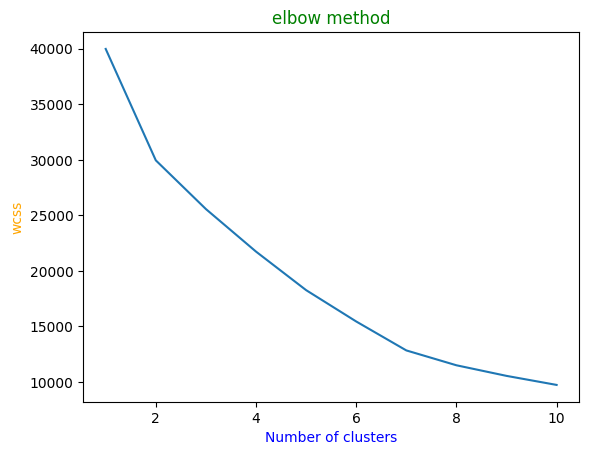

In [23]:
wcss = []

for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wcss.append( KM.inertia_)

plt.plot(range(1,11),wcss)
plt.title('elbow method', color = 'green')
plt.xlabel('Number of clusters',color = 'blue')
plt.ylabel('wcss', color = 'orange')
plt.show()

In [24]:
wcss

[39980.0,
 29950.974964619247,
 25565.991157044533,
 21737.563673442786,
 18268.9104047171,
 15447.336185940156,
 12842.484611355638,
 11505.1975107189,
 10551.11859516719,
 9736.756013732422]

select 7 clusters from above plot:-

In [25]:
model = KMeans(n_clusters=7)
model.fit(Airlines)
model.labels_

array([0, 0, 0, ..., 5, 4, 4], dtype=int32)

In [26]:
x=Airlines.iloc[:,:].values
km = KMeans(n_clusters=7)
y_means = km.fit_predict(scaled_df)
y_means

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [27]:
x[y_means==0,0]

array([0.        , 0.        , 0.04485109, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.45129171, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.12325081,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

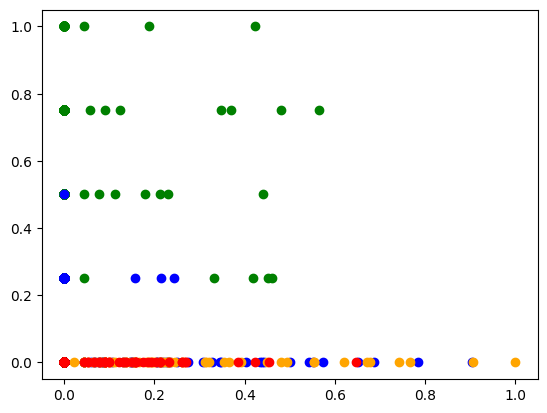

In [28]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],color="green")
plt.scatter(x[y_means==1,0],x[y_means==1,1],color="blue")
plt.scatter(x[y_means==2,0],x[y_means==2,2],color="orange")
plt.scatter(x[y_means==3,0],x[y_means==3,3],color="red")
plt.show()

DB - Scan

In [29]:
Airlines

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,2
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,2
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,2
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,2
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,2


In [30]:
Airlines.drop(['Bonus_miles'],axis=1,inplace=True)
Airlines

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.0,0.00,0.0,0.0,0.011628,0.000000,0.000000,0.843742,0.0,2
1,0.0,0.00,0.0,0.0,0.023256,0.000000,0.000000,0.839884,0.0,2
2,0.0,0.00,0.0,0.0,0.046512,0.000000,0.000000,0.847842,0.0,2
3,0.0,0.00,0.0,0.0,0.011628,0.000000,0.000000,0.837955,0.0,2
4,0.0,0.75,0.0,0.0,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.0,0.00,0.0,0.0,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.0,0.50,0.0,0.0,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.0,0.00,0.0,0.0,0.011628,0.016225,0.018868,0.168676,0.0,2


In [32]:
array_DBSCAN= Airlines.values
array_DBSCAN

array([[0.        , 0.        , 0.        , ..., 0.84374246, 0.        ,
        2.        ],
       [0.        , 0.        , 0.        , ..., 0.83988425, 0.        ,
        2.        ],
       [0.        , 0.        , 0.        , ..., 0.84784181, 0.        ,
        2.        ],
       ...,
       [0.        , 0.5       , 0.        , ..., 0.16879672, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.16867615, 0.        ,
        2.        ],
       [0.        , 0.        , 0.        , ..., 0.16831444, 0.        ,
        2.        ]])

In [33]:
stscaler = StandardScaler().fit(Airlines)
x = stscaler.transform(array_DBSCAN)
x

array([[-0.18632279, -0.76973166, -0.09825429, ...,  1.39523468,
        -0.76707163,  0.77047518],
       [-0.18632279, -0.76973166, -0.09825429, ...,  1.37973643,
        -0.76707163,  0.77047518],
       [-0.18632279, -0.76973166, -0.09825429, ...,  1.41170157,
        -0.76707163,  0.77047518],
       ...,
       [-0.18632279,  0.68289387, -0.09825429, ..., -1.31599028,
         1.30365921, -1.30453983],
       [-0.18632279, -0.76973166, -0.09825429, ..., -1.3164746 ,
        -0.76707163,  0.77047518],
       [-0.18632279, -0.76973166, -0.09825429, ..., -1.31792757,
        -0.76707163,  0.77047518]])

In [34]:
stscler = StandardScaler()
X=stscaler.fit_transform(array_DBSCAN)
X

array([[-0.18632279, -0.76973166, -0.09825429, ...,  1.39523468,
        -0.76707163,  0.77047518],
       [-0.18632279, -0.76973166, -0.09825429, ...,  1.37973643,
        -0.76707163,  0.77047518],
       [-0.18632279, -0.76973166, -0.09825429, ...,  1.41170157,
        -0.76707163,  0.77047518],
       ...,
       [-0.18632279,  0.68289387, -0.09825429, ..., -1.31599028,
         1.30365921, -1.30453983],
       [-0.18632279, -0.76973166, -0.09825429, ..., -1.3164746 ,
        -0.76707163,  0.77047518],
       [-0.18632279, -0.76973166, -0.09825429, ..., -1.31792757,
        -0.76707163,  0.77047518]])

In [35]:
dbscan = DBSCAN (eps = 2, min_samples = 1).fit (x)
dbscan.fit(x)

DBSCAN(eps=2, min_samples=1)

In [36]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [37]:
Airlines['cluster']=pd.DataFrame(dbscan.labels_)
Airlines


,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,cluster
0,0.0,0.00,0.0,0.0,0.011628,0.000000,0.000000,0.843742,0.0,2,0.0
1,0.0,0.00,0.0,0.0,0.023256,0.000000,0.000000,0.839884,0.0,2,0.0
2,0.0,0.00,0.0,0.0,0.046512,0.000000,0.000000,0.847842,0.0,2,0.0
3,0.0,0.00,0.0,0.0,0.011628,0.000000,0.000000,0.837955,0.0,2,0.0
4,0.0,0.75,0.0,0.0,0.302326,0.067398,0.075472,0.835905,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.046512,0.006490,0.018868,0.168917,1.0,0,1.0
3995,0.0,0.00,0.0,0.0,0.058140,0.000000,0.000000,0.167953,1.0,0,1.0
3996,0.0,0.50,0.0,0.0,0.093023,0.000000,0.000000,0.168797,1.0,0,0.0
3997,0.0,0.00,0.0,0.0,0.011628,0.016225,0.018868,0.168676,0.0,2,0.0


In [38]:
Airlines['cluster'].value_counts()

0.0     2467
1.0     1402
24.0      16
14.0       9
9.0        8
        ... 
2.0        1
39.0       1
40.0       1
10.0       1
73.0       1
Name: cluster, Length: 74, dtype: int64

To find the percentage of the noise points:-

In [39]:
(len(Airlines[Airlines['cluster']==-1])/len(Airlines))*100

0.0

In [40]:
X=metrics.silhouette_score(X,dbscan.labels_)
X

0.3725192018438591

In [41]:
def dbscan(X,eps,min_samples):
    ss=StandardScaler()
    db=DBSCAN(eps=eps,min_samples=min_samples)
    db.fit(X)
    y_pred=db.fit_predict(X)
    plt.scatter(x[:,2],x[:,1],c=y_pred,edgecolors='blue')
    plt.scatter(x[:,3],x[:,1],c=y_pred,edgecolors='red')
    plt.scatter(x[:,4],x[:,1],c=y_pred)
    plt.title('DBSCAN')

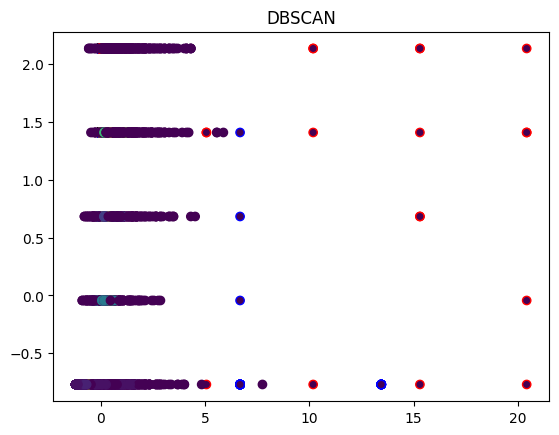

In [42]:
dbscan(scaled_df,0.3,7)